<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayeseana_Com_RSTAN/blob/main/Atividade_Analise_Bayseana_Com_RSTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjundo de dados de confiabilidade de motores

Tutorial de referencia: https://ourcodingclub.github.io/tutorials/stan-intro/

Bayesian Model with RStan: https://www.kaggle.com/code/dhafer/bayesian-model-with-rstan


Fonte dos dados: https://www.kaggle.com/datasets/eduardopoleze/parmetros-operacionais-bombamotor-eltrico

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN



In [ ]:
%load_ext rpy2.ipython

In [ ]:
# run the next line if you already have rstan installed
# remove.packages(c("StanHeaders", "rstan"))
%%R
install.packages("rstan", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))

In [20]:
%%R
library("rstan") # observe startup messages
library("bayesplot")
library("ggplot2")
library("dplyr")
library("magrittr")
#library("ISwR")

In [ ]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Dataset_Motor_Bomba_3.csv", header = TRUE, sep = ";", dec = ",")
head(df)

In [25]:
%%R
names(df)

 [1] "Data"                            "Hora"                           
 [3] "Temp..Estator.Fase.WA"           "Temp..Estator.Fase.WB"          
 [5] "Vibração.Bomba.LA"               "Vazão.Bomba"                    
 [7] "Corrente"                        "Pressão.Desc."                  
 [9] "Pressão.Suc"                     "Posição.FCV"                    
[11] "Temp..externo.mancal.escora.LNA" "Temp..interno.mancal.escora.LNA"
[13] "Pressão.Selo.LA"                 "Pressão.Selo.LNA"               
[15] "Temp..mancal.LA.bomba"           "Temp..mancal.LA.motor"          
[17] "Temp..mancal.LNA.bomba"          "Temp..mancal.LNA.motor"         
[19] "Temp..Oleo.ULF"                 


In [ ]:
%%R
glm1 <- glm(formula = Pressão.Suc ~ Data + Temp..Oleo.ULF + offset(log(Pressão.Selo.LNA)),
            family  = poisson(link = "log"),
            data    = df)
summary(glm1)

In [26]:
%%R
str(df)

'data.frame':	1028881 obs. of  19 variables:
 $ Data                           : chr  "02.01.2016" "02.01.2016" "02.01.2016" "02.01.2016" ...
 $ Hora                           : chr  "0:00:00" "0:02:00" "0:04:00" "0:06:00" ...
 $ Temp..Estator.Fase.WA          : num  36.6 36.6 36.6 36.5 36.5 ...
 $ Temp..Estator.Fase.WB          : num  38.8 38.8 38.8 38.7 38.7 ...
 $ Vibração.Bomba.LA              : num  0 0 0.0367 0 0 ...
 $ Vazão.Bomba                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Corrente                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Desc.                  : num  0.203 0.203 0.203 0.203 0.203 ...
 $ Pressão.Suc                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Posição.FCV                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Temp..externo.mancal.escora.LNA: num  20.7 20.7 20.7 20.7 20.7 ...
 $ Temp..interno.mancal.escora.LNA: num  21 21 21 21 20.9 ...
 $ Pressão.Selo.LA                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Selo.LNA               : num  

In [17]:
%%R
lm1 <- lm(Pressão.Suc ~ Pressão.Selo.LNA, data = df)
summary(lm1)


Call:
lm(formula = Pressão.Suc ~ Pressão.Selo.LNA, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7950 -0.0296  0.0380  0.0804  9.9098 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.0135986  0.0005317  -25.58   <2e-16 ***
Pressão.Selo.LNA  0.9808560  0.0001576 6224.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3685 on 1028879 degrees of freedom
Multiple R-squared:  0.9741,	Adjusted R-squared:  0.9741 
F-statistic: 3.875e+07 on 1 and 1028879 DF,  p-value: < 2.2e-16



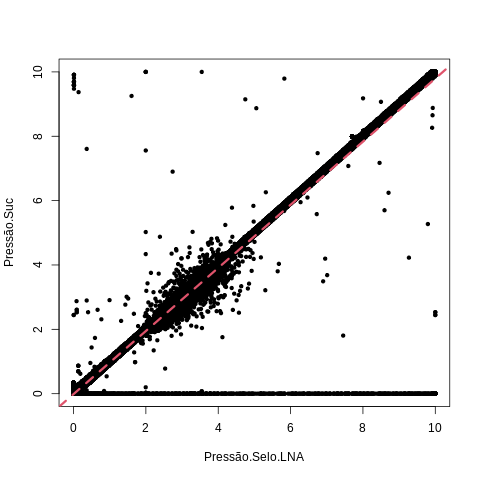

In [18]:
%%R
plot(Pressão.Suc ~ Pressão.Selo.LNA, pch = 20, data = df)
abline(lm1, col = 2, lty = 2, lw = 3)

In [ ]:
%%R
abline(lm1, col = 2, lty = 2, lw = 3)